# 3.利用隐变量解释

In [1]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import scvelo as scv
import velovgi

Global seed set to 0
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## 1. 数据读入

In [2]:
adata = velovgi.tl.read_adata("./data/adata/")

batch_key = "stage" # TODO: 批次key
cluster_key = "celltype" # TODO: 细胞类型key
pseudotime_key = "velocity_pseudotime"
adata

load ./data/adata//adata.h5ad
load ./data/adata//sample_recover.pkl


AnnData object with n_obs × n_vars = 500 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'is_sampled', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'sample_recover'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'fit_t', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

## 2. 隐层表示提取

In [3]:
velovgi_model = velovgi.tl.VELOVGI.load("model/base", adata=adata, use_gpu=True) # TODO: 需要根据gpu进行调换
# latent_umap_key = "X_latent_umap"
# velovgi.tl.get_latent_umap(adata, velovgi_model, latent_umap_key=latent_umap_key)

INFO     File model/base/model.pt already downloaded                                                               


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_latent_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_latent_tsne', embedded velocity vectors (adata.obsm)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_latent_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_latent_phate', embedded velocity vectors (adata.obsm)


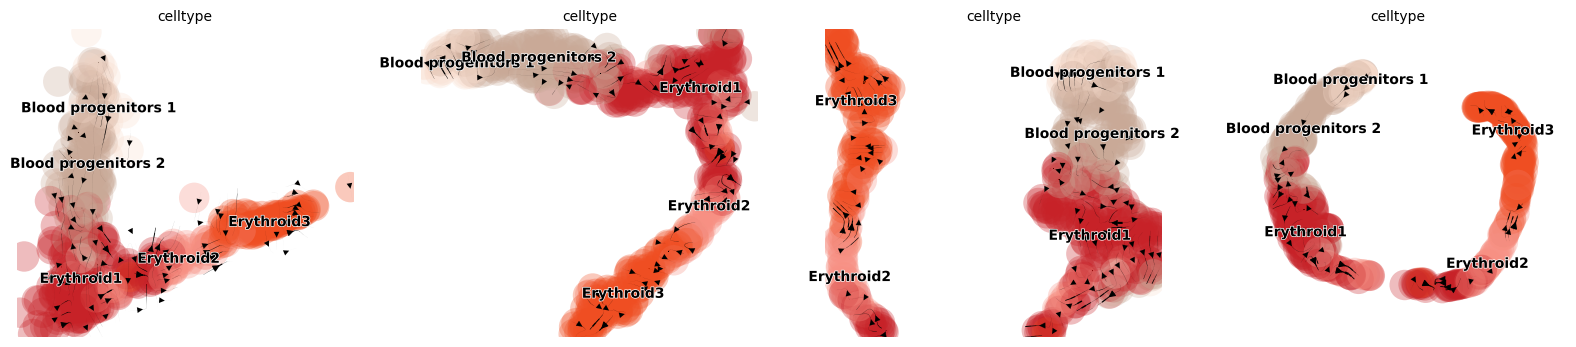

In [4]:
import matplotlib.pyplot as plt

embedding_method_list = ["pca", "tsne", "umap", "phate"]
n = len(embedding_method_list)
fig, ax = plt.subplots(1, n, figsize=(n*5,4))

for i in range(n):
    embedding_method = embedding_method_list[i]
    velovgi.tl.get_latent_embedding(adata, velovgi_model, embedding_method=embedding_method)
    latent_embedding_key = "%s_%s"%("X_latent", embedding_method)
    scv.pl.velocity_embedding_stream(adata, color=cluster_key, basis=latent_embedding_key, colorbar=False, show=False, ax=ax[i])
